In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mechanisms import *
import argparse
### Datasets used are available here: 
### https://github.com/dpcomp-org/dpcomp_core/tree/master/dpcomp_core/datafiles/1D

In [2]:
def median_quality(x):
    A = np.cumsum(x)

    med = np.searchsorted(A, x.sum() / 2)

    N, n = x.sum(), x.size
    q = np.zeros(n)
    for i in range(0, med):
        q[i] = np.ceil(N - 2*A[i])
    q[med] = 0
    for i in range(med+1, n):
        q[i] = np.ceil(2*A[i-1] - N + 1)

    return -q

HEPTH-median.pdf
HEPTH-mode.pdf
MEDCOST-median.pdf
MEDCOST-mode.pdf
ADULTFRANK-median.pdf
ADULTFRANK-mode.pdf
INCOME-median.pdf
INCOME-mode.pdf
SEARCHLOGS-median.pdf
SEARCHLOGS-mode.pdf
PATENT-median.pdf
PATENT-mode.pdf


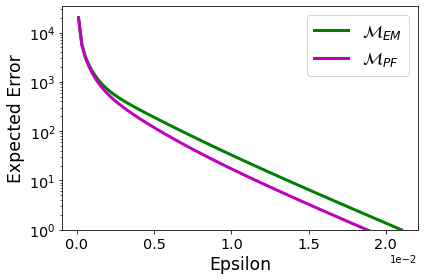

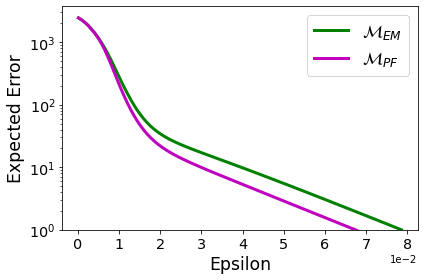

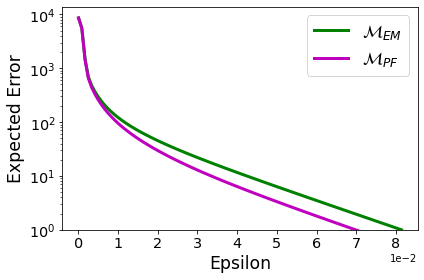

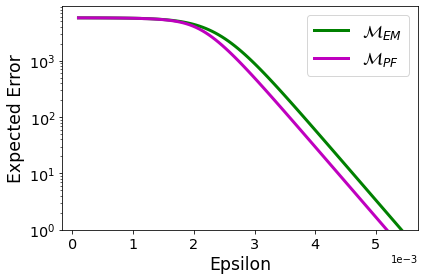

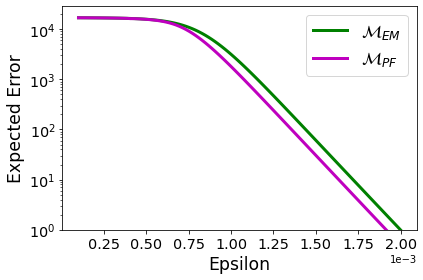

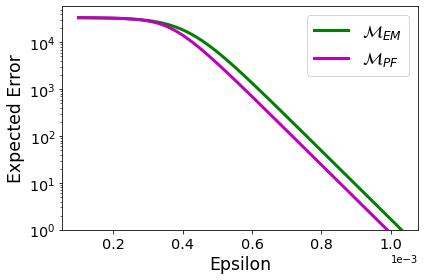

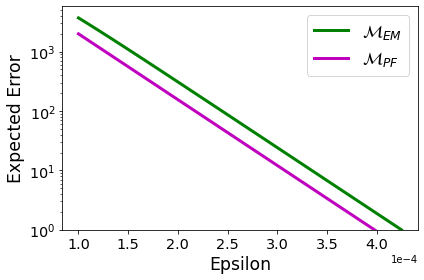

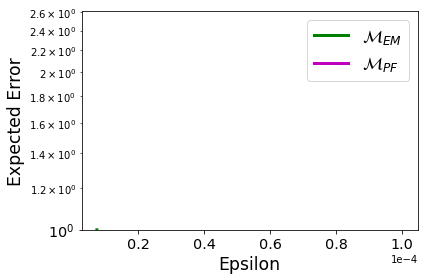

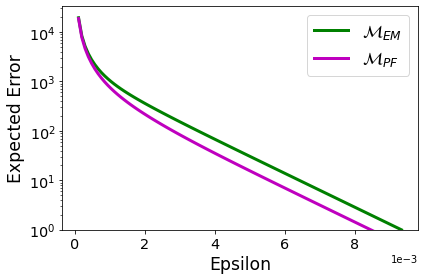

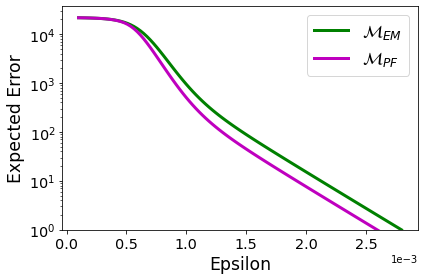

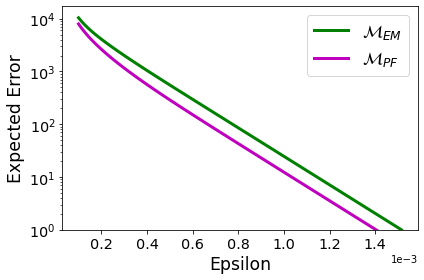

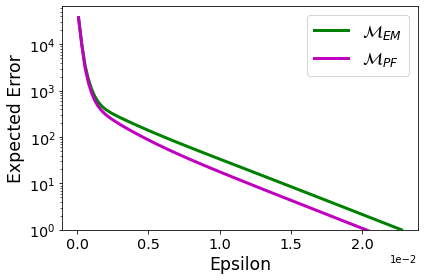

In [3]:
args = lambda: None

def get_lines(q):
    min_eps = 1e-4 #expected_epsilon(q, 1e3, pmf=em_pmf)
    max_eps = expected_epsilon(q, 1.0, pmf=em_pmf)
    epss = np.linspace(min_eps, max_eps, 100)
    pf = [expected_error(q, eps, pf_pmf) for eps in epss]
    em = [expected_error(q, eps, em_pmf) for eps in epss]
    #due to numerical issues sometimes pf = maxerr (for near-zero epsilon)
    # this is a quick fix
    pf = np.minimum(pf, em)
    
    return epss, em, pf

for dataset in ['HEPTH','MEDCOST','ADULTFRANK','INCOME','SEARCHLOGS','PATENT']:
    for problem in ['median','mode']:
        args.dataset = dataset
        args.problem = problem
        args.domain = 1024

        x = np.load('data/%s.n4096.npy' % args.dataset).astype(np.float64)
        x = x.reshape(args.domain,-1).sum(axis=1)
        if args.problem == 'median':
            q = median_quality(x)
        elif args.problem == 'mode':
            q = 2*x # due to monotonicity of mode
        name = '%s-%s.pdf' % (args.dataset, args.problem)
        epss, em, pf = get_lines(q)
        
        fig = plt.figure()
        plt.plot(epss, em, 'g', linewidth=3, label='$\mathcal{M}_{EM}$')
        plt.plot(epss, pf, 'm', linewidth=3, label='$\mathcal{M}_{PF}$')
        
        plt.yscale('log')
        plt.ylim(1,None)
        plt.xlabel('Epsilon', fontsize='xx-large')
        plt.ylabel('Expected Error', fontsize='xx-large')
        plt.xticks(fontsize='x-large')
        plt.yticks(fontsize='x-large')
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        plt.legend(fontsize='xx-large')
        plt.tight_layout()
        plt.savefig(name)
        print(name)

In [ ]:
args = lambda: None

def get_bar(q):
    em_util = 50
    eps = expected_epsilon(q, 50.0, pmf=em_pmf)
    pf_util = expected_error(q, eps, pmf=pf_pmf)
    return eps, em_util, pf_util

datasets = ['HEPTH','ADULTFRANK','MEDCOST','SEARCHLOGS','PATENT']

for problem in ['mode','median']:
    epss, ems, pfs = [], [], []
    for dataset in datasets:
        args.dataset = dataset
        args.problem = problem
        args.domain = 1024

        x = np.load('data/%s.n4096.npy' % args.dataset).astype(np.float64)
        x = x.reshape(args.domain,-1).sum(axis=1)
        if args.problem == 'median':
            q = median_quality(x)
        elif args.problem == 'mode':
            q = 2*x # due to monotonicity of mode
        name = '%s-bar.pdf' % args.problem
        eps, em, pf = get_bar(q)
        epss.append(eps)
        ems.append(em)
        pfs.append(pf)

    x = np.arange(len(datasets))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, ems, width, label='$\mathcal{M}_{EM}$')
    rects2 = ax.bar(x + width/2, pfs, width, label='$\mathcal{M}_{PF}$')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Expected Error', fontsize='x-large')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    plt.yticks(fontsize='x-large')
    ax.legend(fontsize='xx-large')
    plt.savefig('%s-bar.pdf'%args.problem)